In [1]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import array
import pandas as pd

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter

from lifelines import CoxPHFitter

from Data.dataset import Flchain
from Data.dataset import SimPHDataset

from scipy.stats import ttest_ind, ttest_rel

from model import CPH, ExpMultiTrues
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = SimPHDataset(percentage_cens=0.5, verbose=True)

Dataset Description =======================
Dataset Name: SimPHDataset
Dataset Shape: (1000, 9)
Events: 50.00 %
NaN Values: 0.00 %
Size and Events % in splits: (200, 50.00%), (200, 50.00%), (200, 50.00%), (200, 50.00%), (200, 50.00%), 



In [3]:
percentage_cens = 0.5
m_exp = ExpMultiTrues(dataset_class=SimPHDataset, dataset_filepath=None, test_fract=0.3, percentage_cens=percentage_cens)
m_exp.run(repetitions=1000)

Correct events_p: 0.25
4.51 mind: 999
Correct events_p: 0.5
4.95 mind: 999
Correct events_p: 0.75
5.64 mind: 999


In [4]:
# np.save('results/true_vs_random/ctrains_true_ps.npy',np.array(m_exp.ctrains_true_ps))
# np.save('results/true_vs_random/ctrains_some_ps.npy',np.array(m_exp.ctrains_some_ps))
# np.save('results/true_vs_random/cvals_true_ps.npy',np.array(m_exp.cvals_true_ps))
# np.save('results/true_vs_random/cvals_some_ps.npy',np.array(m_exp.cvals_some_ps))
# np.save('results/true_vs_random/accuracies.npy',np.array(m_exp.accuracies))
# np.save('results/true_vs_random/accuracies_true.npy',np.array(m_exp.accuracies_true))


In [5]:
ctrains_true_ps = np.load('results/true_vs_random/ctrains_true_ps.npy')
ctrains_some_ps = np.load('results/true_vs_random/ctrains_some_ps.npy')
cvals_true_ps= np.load('results/true_vs_random/cvals_true_ps.npy')
cvals_some_ps= np.load('results/true_vs_random/cvals_some_ps.npy')
accuracies = np.load('results/true_vs_random/accuracies.npy')
accuracies_true = np.load('results/true_vs_random/accuracies_true.npy')

In [56]:

    
def plot_ones_acc_vs_cindex():
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    ax[0].set_title('Train')
    ax[0].scatter(accuracies_true.reshape(-1), ctrains_true_ps.reshape(-1),
                  label='True Labels', alpha=0.2)
    ax[0].scatter(accuracies_true.reshape(-1), ctrains_some_ps.reshape(-1),
                  label='Random Labels', alpha=0.2)
    # ax[0].scatter(np.array(self.accuracies_true[5:]).reshape(-1), np.array(self.ctrains_some_ps[5:]).reshape(-1), label='High True 1s', alpha=0.2)
    # ax[0].scatter(np.array(range(1, len(self.ctrains_true_ps)+1))*0.1, self.ctrains_true_ps, marker='+', s=100, c='k')
    ax[0].set_xlabel('E Accuracy')
    ax[0].set_ylabel('C-Index')
    ax[0].legend()

    ax[1].set_title('Val')
    ax[1].scatter(accuracies_true.reshape(-1), cvals_true_ps.reshape(-1), alpha=0.2,
                  label='True Labels')
    ax[1].scatter(accuracies_true.reshape(-1), cvals_some_ps.reshape(-1), alpha=0.2,
                  label='Random Labels')
    # ax[1].scatter(np.array(self.accuracies_true[5:]).reshape(-1), np.array(self.cvals_some_ps[5:]).reshape(-1), label='High True 1s', alpha=0.2)

    # ax[1].scatter(np.array(range(1, len(self.cvals_true_ps)+1))*0.1, self.cvals_true_ps, marker='+', s=100, c='k')
    ax[1].set_xlabel('E Accuracy')
    ax[1].set_ylabel('C-Index')
    ax[1].legend()
    
def plot_true_vs_random():
    cdiff_train_ps = []
    cdiff_val_ps = []
    inc_prob_train_ps = []
    inc_prob_val_ps = []
    correctly_labeled_ps = [0.25, 0.50, 0.75]
    for i in range(3):
        cdiff_train = ctrains_true_ps[i] - ctrains_some_ps[i]
        cdiff_val = cvals_true_ps[i] - cvals_some_ps[i]
        inc_prob_train, inc_prob_val = (cdiff_train > 0).mean(), (cdiff_val > 0).mean()
        cdiff_train_ps.append(cdiff_train)
        cdiff_val_ps.append(cdiff_val)
        inc_prob_train_ps.append(inc_prob_train)
        inc_prob_val_ps.append(inc_prob_val)

        fig, ax = plt.subplots(1, 3, figsize=(15, 3))
        # 'Correctly Labeled Events: {:.1f}'.format(((i+1)*0.1))
        fig.suptitle(f'Censoring:{percentage_cens:.1f}, Correctly labeled event {correctly_labeled_ps[i]:.1f}')
        ax[0].set_title('Train C-Index')
        ax[0].plot(ctrains_true_ps[i], label='True Events')
        ax[0].plot(ctrains_some_ps[i], label='Random Events')
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('CI')
        ax[0].legend()

        ax[1].set_title('Val C-Index')
        ax[1].plot(cvals_true_ps[i], label='True Events')
        ax[1].plot(cvals_some_ps[i], label='Random Events')
        ax[1].set_xlabel('Iterations')
        ax[1].set_ylabel('CI')
        ax[1].legend()

        ax[2].set_title('P(true>random), Train: {:.2f}, Val: {:.2f}'.format(inc_prob_train, inc_prob_val))
        ax[2].plot(cdiff_train, label='Train C-Index Diff', c='k')
        ax[2].plot(cdiff_val, label='Val C-Index Diff', c='gray')
        plt.axhline(0, c='C2', ls=':')
        ax[2].set_xlabel('Iterations')
        ax[2].set_ylabel('CI diff')
        ax[2].legend()
        fig.tight_layout()

        
def plot_true_vs_random_box():
    correctly_labeled_ps = [0.25, 0.50, 0.75]
    for i in range(3):
        #fig, ax = plt.subplots(1, 2, figsize=(6, 2))
        
        cdiff_train = ctrains_true_ps[i] - ctrains_some_ps[i]
        cdiff_val = cvals_true_ps[i] - cvals_some_ps[i]
        inc_prob_train, inc_prob_val = (cdiff_train > 0).mean(), (cdiff_val > 0).mean()
        
        plt.figure(figsize=(3,2))
        #plt.boxplot([ctrains_true_ps[i], ctrains_some_ps[i]]);
        sns.boxplot(data=[ctrains_true_ps[i], ctrains_some_ps[i]]);
        plt.xticks([0, 1], ['True', 'Random'])
        plt.ylabel('C-Index')
        plt.title('P(true>random): {:.2f}'.format(inc_prob_train))
        plt.ylim(0.7, 1)
        plt.tight_layout()
        plt.savefig(f'results/true_vs_random/figs/correctly_labeled_p_{correctly_labeled_ps[i]}_train.pdf')
        
        plt.figure(figsize=(3,2))
        #plt.boxplot([cvals_true_ps[i], cvals_some_ps[i]]);
        sns.boxplot(data=[cvals_true_ps[i], cvals_some_ps[i]]);
        plt.xticks([0, 1], ['True', 'Random'])
        plt.ylabel('C-Index')
        plt.title('P(true>random): {:.2f}'.format(inc_prob_val))
        plt.ylim(0.7, 1)
        plt.tight_layout()
        plt.savefig(f'results/true_vs_random/figs/correctly_labeled_p_{correctly_labeled_ps[i]}_test.pdf')
    

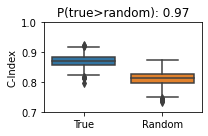

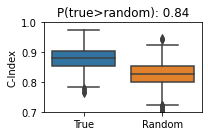

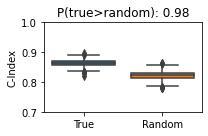

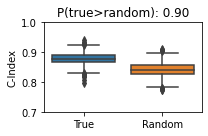

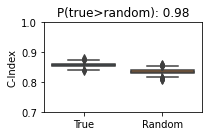

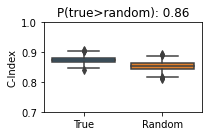

In [57]:
plot_true_vs_random_box()

In [ ]:
def plot_true_vs_random_box():
    correctly_labeled_ps = [0.25, 0.50, 0.75]
    for i in range(3):
        #fig, ax = plt.subplots(1, 2, figsize=(6, 2))
        
        cdiff_train = ctrains_true_ps[i] - ctrains_some_ps[i]
        cdiff_val = cvals_true_ps[i] - cvals_some_ps[i]
        inc_prob_train, inc_prob_val = (cdiff_train > 0).mean(), (cdiff_val > 0).mean()
        
        plt.figure(figsize=(3,2))
        #plt.boxplot([ctrains_true_ps[i], ctrains_some_ps[i]]);
        sns.boxplot(data=[ctrains_true_ps[i], ctrains_some_ps[i]]);
        plt.xticks([0, 1], ['True', 'Random'])
        plt.ylabel('C-Index')
        plt.title('P(true>random): {:.2f}'.format(inc_prob_train))
        plt.ylim(0.7, 1)
        plt.tight_layout()
        plt.savefig(f'results/true_vs_random/figs/correctly_labeled_p_{correctly_labeled_ps[i]}_train.pdf')
        
        plt.figure(figsize=(3,2))
        #plt.boxplot([cvals_true_ps[i], cvals_some_ps[i]]);
        sns.boxplot(data=[cvals_true_ps[i], cvals_some_ps[i]]);
        plt.xticks([0, 1], ['True', 'Random'])
        plt.ylabel('C-Index')
        plt.title('P(true>random): {:.2f}'.format(inc_prob_val))
        plt.ylim(0.7, 1)
        plt.tight_layout()
        plt.savefig(f'results/true_vs_random/figs/correctly_labeled_p_{correctly_labeled_ps[i]}_test.pdf')
    

In [81]:
df_train_true = pd.DataFrame(ctrains_true_ps.transpose(), columns=['25%', '50%', '75%'])
df_train_true['Label'] = 'True'
df_train_random = pd.DataFrame(ctrains_some_ps.transpose(), columns=['25%', '50%', '75%'])
df_train_random['Label'] = 'Random'

df_train = pd.concat([df_train_true, df_train_random])


df_test_true = pd.DataFrame(cvals_true_ps.transpose(), columns=['25%', '50%', '75%'])
df_test_true['Label'] = 'True'
df_test_random = pd.DataFrame(cvals_some_ps.transpose(), columns=['25%', '50%', '75%'])
df_test_random['Label'] = 'Random'

df_test = pd.concat([df_test_true, df_test_random])

df_train_m = pd.melt(df_train, id_vars=['Label'], value_vars=['25%', '50%', '75%'])
df_test_m = pd.melt(df_test, id_vars=['Label'], value_vars=['25%', '50%', '75%'])

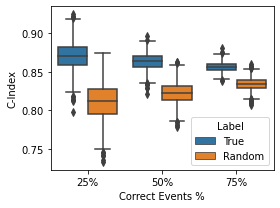

In [93]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df_train_m, x='variable', y='value', hue='Label');
plt.xlabel('Correct Events %')
plt.ylabel('C-Index')
plt.tight_layout()
plt.savefig(f'results/true_vs_random/figs/true_vs_random_train.pdf')

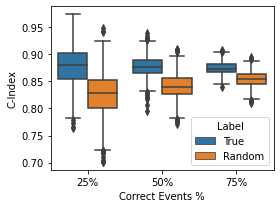

In [94]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df_test_m, x='variable', y='value', hue='Label');
plt.xlabel('Correct Events %')
plt.ylabel('C-Index')
plt.tight_layout()
plt.savefig(f'results/true_vs_random/figs/true_vs_random_test.pdf')